#### Importeer de juiste libraries

In [95]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from random import sample

%matplotlib inline

#### Laad en bekijk de data

In [96]:
data = pd.read_csv('studentenonderzoek.csv')

In [97]:
list(data.columns)

['Groep',
 'Geslacht',
 'Leeftijd',
 'Lengte',
 'Gewicht',
 'Profiel',
 'Woonsituatie',
 'Reistijd',
 'Vervoermiddel',
 'TijdStudie',
 'TevTijdStudie',
 'CijferStudie',
 'Bijbaan',
 'TijdBijbaan',
 'StudLeven',
 'SocialMedia',
 'TijdSocialMedia',
 'ManierSocialMedia',
 'CijferLeven',
 'TijdBachelor',
 'OP1',
 'OP2',
 'OP3',
 'CON1',
 'CON2',
 'CON3',
 'OP4',
 'CON4',
 'OP5',
 'CON5',
 'OP6',
 'OP7',
 'CON6',
 'CON7',
 'OP8',
 'CON8',
 'OP9',
 'CON9',
 'OP10',
 'CON10',
 'CON',
 'OP']

#### Verwijder de kolommen waarvan de titel niet aangeeft wat de feature betekent. Verwijder ook de data die niet numeriek is

In [98]:
data = data.drop(list(data)[19:42], axis=1)
data = data.drop(columns = ["SocialMedia", "ManierSocialMedia"], axis=1)

In [99]:
list(data.columns)

['Groep',
 'Geslacht',
 'Leeftijd',
 'Lengte',
 'Gewicht',
 'Profiel',
 'Woonsituatie',
 'Reistijd',
 'Vervoermiddel',
 'TijdStudie',
 'TevTijdStudie',
 'CijferStudie',
 'Bijbaan',
 'TijdBijbaan',
 'StudLeven',
 'TijdSocialMedia',
 'CijferLeven']

#### Plot histogrammen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128716ed0>]],
      dtype=object)

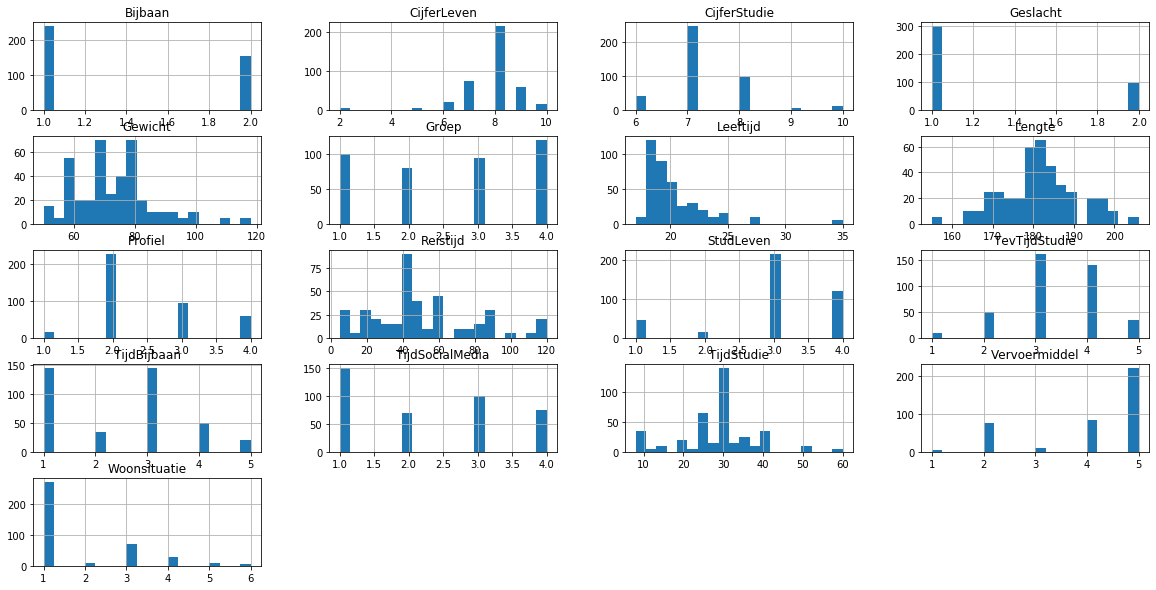

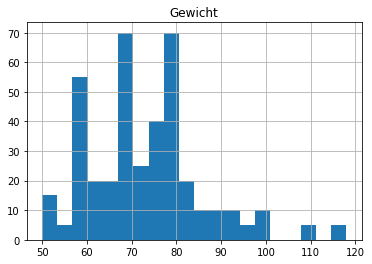

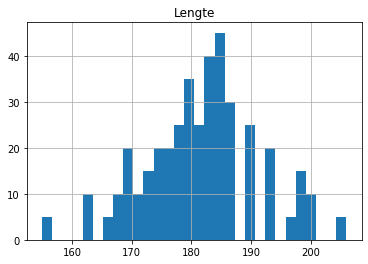

In [100]:
# Als je alle data tegelijk wil plotten:
data.hist(bins = 20, figsize = (20,10))

# Als je maar 1 variabele wil plotten
data.hist(column = "Gewicht", bins = 20)
data.hist(column = "Lengte", bins = 30)

#### Check of de data normaal verdeeld is met Shapiro-Wilk

In [101]:
# Voorbeeld met feature Lengte. Je kan dit voor elke feature doen.
stat, p = stats.shapiro(data.Lengte)
print(stat, p)
alpha = 0.05
if p > alpha:
    print('Wel normaal verdeeld (Behoud H0)')
else:
    print('Niet normaal verdeeld (Verwerp H0)')

0.9859892129898071 0.0007277005934156477
Niet normaal verdeeld (Verwerp H0)


#### Zet de features om in z-scores (normaliseren)

In [102]:
print(data[0:5])
scaler = StandardScaler()
data_z = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
print(data_z[0:5])

   Groep  Geslacht  Leeftijd  Lengte  Gewicht  Profiel  Woonsituatie  \
0      1         2        18     178       67        2             1   
1      1         1        21     190       78        2             1   
2      1         1        23     206       95        3             1   
3      1         1        19     185       65        4             1   
4      1         1        19     174       70        2             1   

   Reistijd  Vervoermiddel  TijdStudie  TevTijdStudie  CijferStudie  Bijbaan  \
0        90              5          30              4             8        1   
1        45              4          30              3             7        2   
2        40              5          25              4             7        2   
3        60              5          30              4             9        1   
4        60              4          30              3             7        2   

   TijdBijbaan  StudLeven  TijdSocialMedia  CijferLeven  
0            3          4   

#### Maak een correlatiematrix, heatmap en scatter matrix

In [103]:
# Correlatie
corr_matrix = data.corr()
print(corr_matrix["CijferLeven"]) # Voor de correlatie met 1 variabele
#print(corr_matrix) # Voor de hele matrix

Groep             -0.251262
Geslacht          -0.176816
Leeftijd           0.071214
Lengte             0.122220
Gewicht            0.050935
Profiel           -0.127944
Woonsituatie      -0.111803
Reistijd          -0.133588
Vervoermiddel      0.157408
TijdStudie        -0.054289
TevTijdStudie      0.075423
CijferStudie       0.157497
Bijbaan           -0.058480
TijdBijbaan        0.024584
StudLeven         -0.286912
TijdSocialMedia    0.094349
CijferLeven        1.000000
Name: CijferLeven, dtype: float64


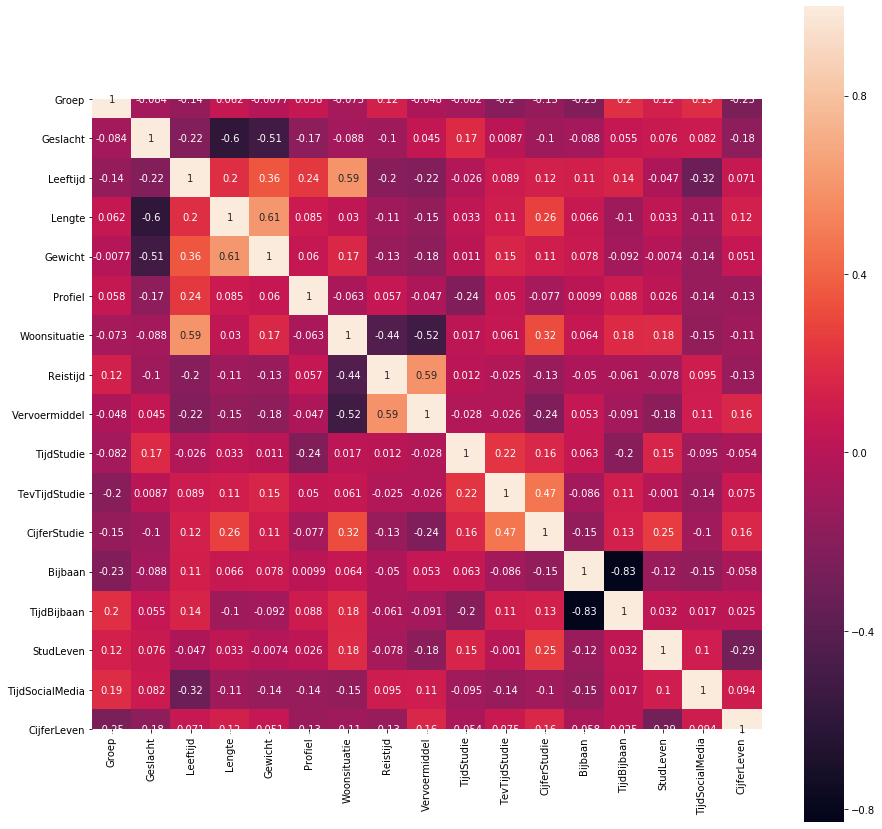

In [104]:
# Heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, square = True)

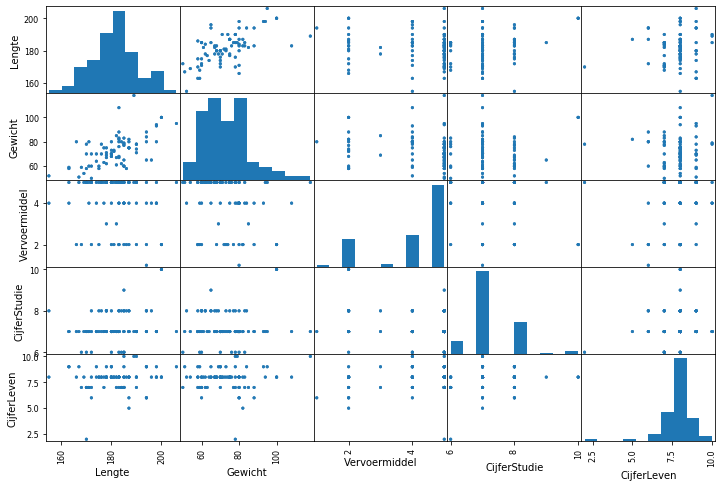

In [105]:
# Scatter matrix
attributes = ["Lengte", "Gewicht", "Vervoermiddel", "CijferStudie", "CijferLeven"]
scatter_matrix(data[attributes], figsize = (12, 8))
plt.show()

#### Maak een regressiemodel met CijferLeven als y (target value) en alle andere variabelen als X (feature matrix). Bedenk goed of het hier over lineaire of logistische regressie gaat. Bekijk ook de coefficienten van het model.

In [106]:
X = data_z.drop(columns = ["CijferLeven"], axis=1)
y = data_z.CijferLeven
model = LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
print(model.coef_) # Hiermee bekijk je de coefficienten zodat je kan vergelijken hoe zwaar verschillende features meetellen.

[-0.17850652 -0.30878171  0.3050806  -0.06413101 -0.1133992  -0.14854942
 -0.34572274 -0.42597974  0.26933548 -0.01082026 -0.05139518  0.28839803
 -0.23299836 -0.1316224  -0.25766041  0.18055253]


#### Plot een egressiemodel dat de relatie weergeeft tussen tussen lengte en gewicht. Bedenk goed of het over lineaire of logistische regressie gaat.

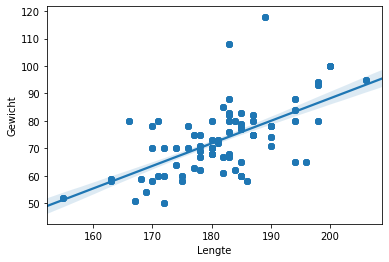

In [107]:
sns.regplot(x="Lengte", y="Gewicht", data=data)

#### Neem een steekproef van 10, 20 en 100 personen

In [108]:
steekproef_10 = data.sample(n=10)
steekproef_20 = data.sample(n=20)
steekproef_100 = data.sample(n=100)
print(steekproef_10)

     Groep  Geslacht  Leeftijd  Lengte  Gewicht  Profiel  Woonsituatie  \
86       2         2        18     170       70        3             1   
333      2         2        18     155       52        2             1   
327      1         1        22     185       77        2             3   
120      4         2        19     168       59        2             1   
197      3         1        18     184       62        2             3   
112      4         1        18     183       83        2             1   
328      2         1        23     180       68        2             3   
36       4         1        23     198       80        2             1   
215      4         1        20     184       80        4             1   
50       1         1        27     178       69        2             5   

     Reistijd  Vervoermiddel  TijdStudie  TevTijdStudie  CijferStudie  \
86         49              5          15              3             7   
333        80              4          3

#### Vergelijk lengte van mannen en van vrouwen. Zijn mannen gemiddeld langer dan vrouwen?

In [109]:
# Hier staat een voorbeeld van een t-toets op de hele dataset.
# Je kan zelf de t-toets toepassen op verschillende steekproeven toepassen.

# Maak eerst een opsplitsing in de data tussen mannen en vrouwen
mannen = data.loc[data['Geslacht'] == 1]
vrouwen = data.loc[data['Geslacht'] == 2]

# Voer een t-test uit
stats.ttest_ind(mannen.Lengte,vrouwen.Lengte)

# H0: Er is geen verschil tussen deze groepen
# p < 0.05: H0 wordt verworpen dus er is wél een significant verschil in lengte tussen mannen en vrouwen

Ttest_indResult(statistic=14.682041885285383, pvalue=3.2362264600031355e-39)

#### Bekijk met t-testen welke variabelen relevant zijn voor het voorspellen van een bijbaan 

In [110]:
bijbaan = data.loc[data['Bijbaan'] == 1]
geen_bijbaan = data.loc[data['Bijbaan'] == 2]

print(stats.ttest_ind(bijbaan.Lengte,geen_bijbaan.Lengte))
print(stats.ttest_ind(bijbaan.Gewicht,geen_bijbaan.Gewicht))
print(stats.ttest_ind(bijbaan.Reistijd,geen_bijbaan.Reistijd))
print(stats.ttest_ind(bijbaan.TijdStudie,geen_bijbaan.TijdStudie))
print(stats.ttest_ind(bijbaan.TevTijdStudie,geen_bijbaan.TevTijdStudie))
print(stats.ttest_ind(bijbaan.CijferStudie,geen_bijbaan.CijferStudie))
print(stats.ttest_ind(bijbaan.TijdBijbaan,geen_bijbaan.TijdBijbaan))
print(stats.ttest_ind(bijbaan.StudLeven,geen_bijbaan.StudLeven))
print(stats.ttest_ind(bijbaan.Lengte,geen_bijbaan.TijdSocialMedia))
print(stats.ttest_ind(bijbaan.Gewicht,geen_bijbaan.CijferLeven))

# H0: Er is geen verschil tussen de groepen.
# Op basis van de p-waarden wordt H0 verworpen en is er dus wél een significant verschil voor:
# CijferStudie, TijdBijbaan, StudLeven, TijdSocialMedia, CijferLeven 

Ttest_indResult(statistic=-1.3117156440942652, pvalue=0.19038183357949373)
Ttest_indResult(statistic=-1.5503036950976812, pvalue=0.12187352699470094)
Ttest_indResult(statistic=0.9871574067588795, pvalue=0.32417283978392486)
Ttest_indResult(statistic=-1.252664992850878, pvalue=0.21107251803397478)
Ttest_indResult(statistic=1.711028985424822, pvalue=0.08786484120873862)
Ttest_indResult(statistic=3.090277321442695, pvalue=0.002142038189400547)
Ttest_indResult(statistic=29.325863439679132, pvalue=5.4452301298152565e-101)
Ttest_indResult(statistic=2.424044732003998, pvalue=0.015799147121175392)
Ttest_indResult(statistic=227.14057203959257, pvalue=0.0)
Ttest_indResult(statistic=65.70488247634046, pvalue=4.681987176210273e-214)
